In [2]:
#SimpleRNN
#https://github.com/Alireza-Akhavan/rnn-notebooks

In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.jpijnswnnan3ce6lli5fwsphut2vxmth.gfortran-win_amd64.dll
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# 

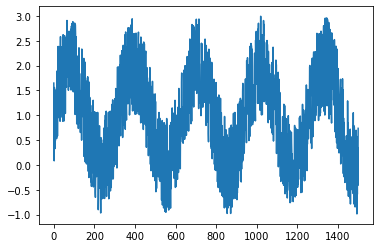

In [4]:
t = np.arange(0,1500)
x = np.sin(0.02*t)+ np.random.rand(1500) * 2
plt.plot(x)
plt.show()

# 

In [5]:
train,test = x[0:1000], x[1000:]

# 

    x = [1,2,3,4,5,6,7,8,9,10]
    
    for step=1, x input  and its y prediction becomes:
    
    x  y
    1  2
    2  3
    3  4
    4  5
    ..
    9  10
    
    for step=3, x and y contain:
    
    x         y
    1,2,3     4
    2,3,4     5
    3,4,5     6
    4,5,6     7
    ...
    7,8,9     10


In [6]:
step = 10

# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

trainX,trainY =convertToDataset(train,step)
testX,testY =convertToDataset(test,step)

In [7]:
print(trainX.shape)
print(testX.shape)

(990, 10)
(490, 10)


# 
</div>

    (NumberOfSequences, TimeSteps, ElementsPerStep)

In [8]:
trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

In [9]:
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(490, 10, 1)


# 

In [10]:
model = Sequential()
model.add(SimpleRNN(units=64, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

model.summary() 
model.input

# 

In [11]:
history = model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
62/62 - 2s - loss: 0.4577
Epoch 2/100
62/62 - 0s - loss: 0.4126
Epoch 3/100
62/62 - 0s - loss: 0.4026
Epoch 4/100
62/62 - 0s - loss: 0.3851
Epoch 5/100
62/62 - 0s - loss: 0.3885
Epoch 6/100
62/62 - 0s - loss: 0.3906
Epoch 7/100
62/62 - 0s - loss: 0.3816
Epoch 8/100
62/62 - 0s - loss: 0.3772
Epoch 9/100
62/62 - 0s - loss: 0.3831
Epoch 10/100
62/62 - 0s - loss: 0.3686
Epoch 11/100
62/62 - 0s - loss: 0.3707
Epoch 12/100
62/62 - 0s - loss: 0.3664
Epoch 13/100
62/62 - 0s - loss: 0.3602
Epoch 14/100
62/62 - 0s - loss: 0.3643
Epoch 15/100
62/62 - 0s - loss: 0.3623
Epoch 16/100
62/62 - 0s - loss: 0.3594
Epoch 17/100
62/62 - 0s - loss: 0.3636
Epoch 18/100
62/62 - 0s - loss: 0.3570
Epoch 19/100
62/62 - 0s - loss: 0.3541
Epoch 20/100
62/62 - 0s - loss: 0.3524
Epoch 21/100
62/62 - 0s - loss: 0.3503
Epoch 22/100
62/62 - 0s - loss: 0.3453
Epoch 23/100
62/62 - 0s - loss: 0.3481
Epoch 24/100
62/62 - 0s - loss: 0.3391
Epoch 25/100
62/62 - 0s - loss: 0.3391
Epoch 26/100
62/62 - 0s - loss: 0.


model.input


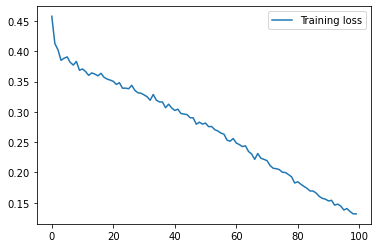

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
plt.plot(loss, label='Training loss')
plt.legend()

plt.show()

# 

In [13]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.10354095697402954


# 

In [14]:
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

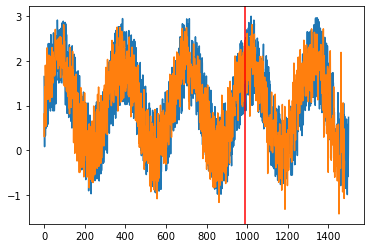

In [15]:
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c="r")
plt.show()

# 

In [16]:
testX,testY =convertToDataset(test,50)

In [17]:
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))
testX.shape

(450, 50, 1)

In [18]:
testPredict= model.predict(testX)


In [19]:
model.input

<KerasTensor: shape=(None, None, 1) dtype=float32 (created by layer 'simple_rnn_input')>